In [9]:
import ROOT as rt
import csv
import re
import sys
import collections
from collections import OrderedDict
import uproot
import numpy as np
import time
import numba
from numba import jit
from matplotlib import pyplot as plt
from numpy import linalg as LA
from ROOT import TLorentzVector
from array import array
# import PyTEX
import os

import math
import random
from optparse import OptionParser

sys.path.append('/storage/af/user/jmao/gpu/jmao/cms-llp/delayed_jet_analyzer/lib/')

from histo_utilities import create_TH1D, create_TH2D, create_TGraph,std_color_list, make_ratio_plot

import CMS_lumi, tdrstyle 
tdrstyle.setTDRStyle()
CMS_lumi.writeExtraText = 1
CMS_lumi.extraText = "     Simulation Preliminary"

     
print(sys.version)

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
import pandas as pd
import pickle as pickle
import shlex
import uproot
import seaborn as sns

from scipy.spatial.distance import cdist
from collections import Counter 
import datetime
import pytz

from prettytable import PrettyTable
from pyjet import cluster

import xgboost as xgb
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from xgboost import XGBClassifier

from itertools import chain 

3.6.8 (default, Aug  7 2019, 17:28:10) 
[GCC 4.8.5 20150623 (Red Hat 4.8.5-39)]


In [28]:
# root settings
rt.gROOT.SetBatch(True)
rt.gStyle.SetOptStat(0)
rt.gStyle.SetOptFit(111)
rt.gStyle.SetPaintTextFormat("2.1f")

# plt.rcParams["font.family"] = "Arial"
plt.rcParams["axes.unicode_minus"] = False
plt.rcParams["text.usetex"] = False
plt.rcParams["mathtext.fontset"] = "cm"

# test_name = 'xgb_HH_vs_QCD_ebBDT'

lumi_sf_sig = 137.0 # scale lumi from sample to full run2
lumi_sf_bkg = 137.0

#output dir
 

# 
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20210420/Data_Pred/'
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20210420/minDR/Data_Pred/'
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20210420/minDR/minDR_Data_Pred/'
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20210526/Bkg_Pred/MET_SR/2017/'
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20210536/Bkg_Pred/CR_2017/'
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20210536/Bkg_Pred/CR_2017/Mu/'
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20210536/Bkg_Pred/CR_2017/Mu_nodphi/'
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20210536/Bkg_Pred/CR_2017/Ele_nodphi/'
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20210536/Bkg_Pred/CR_2017/Ele/'
# plotDir = '/storage/af/user/jmao/gpu/jmao/cms-llp/plots/20210536/Bkg_Pred/CR_2016/Ele/'
# plotDir = '/storage/af/user/jmao/gpu/jmao/cms-llp/plots/20210536/Bkg_Pred/CR_2016/Ele_nodphi/'
# plotDir = '/storage/af/user/jmao/gpu/jmao/cms-llp/plots/20210536/Bkg_Pred/CR_2018/Mu_nodphi/'
# plotDir = '/storage/af/user/jmao/gpu/jmao/cms-llp/plots/20210536/Bkg_Pred/CR_2018/Mu/'
# plotDir = '/storage/af/user/jmao/gpu/jmao/cms-llp/plots/20210536/Bkg_Pred/CR_2016/Mu/'
# plotDir = '/storage/af/user/jmao/gpu/jmao/cms-llp/plots/20210536/Bkg_Pred/CR_2016/Mu_nodphi/'
# plotDir = '/storage/af/user/jmao/gpu/jmao/cms-llp/plots/20210621/Bkg_Pred/CR_Mu_nodphi/'
# plotDir = '/storage/af/user/jmao/gpu/jmao/cms-llp/plots/20210621/Bkg_Pred/CR_Mu_nodphi_noVeto/'
# plotDir = '/storage/af/user/jmao/gpu/jmao/cms-llp/plots/20210621/Bkg_Pred/CR_Mu_nodphi_noVeto_noEle/'
# plotDir = '/storage/af/user/jmao/gpu/jmao/cms-llp/plots/20210621/Bkg_Pred/CR_Mu_nodphi_testBin0/'
# plotDir = '/storage/af/user/jmao/gpu/jmao/cms-llp/plots/20210621/Bkg_Pred/CR_Mu_nodphi_fixBin0/'
# plotDir = '/storage/af/user/jmao/gpu/jmao/cms-llp/plots/20210817/Bkg_Pred/CR_Mu_nodphi_fixBin0/'
# plotDir = '/storage/af/user/jmao/gpu/jmao/cms-llp/plots/20210817/Bkg_Pred/CR_Mu_nodphi_fixBin0_eff_eta/'
plotDir = '/storage/af/user/jmao/gpu/jmao/cms-llp/plots/20210817/Bkg_Pred/CR_Mu_nodphi_fixBin0_eff_pt/'
# plotDir = '/storage/af/user/jmao/gpu/jmao/cms-llp/plots/20210621/Bkg_Pred/CR_Mu_mdphi_2p4/'
# plotDir = '/storage/af/user/jmao/gpu/jmao/cms-llp/plots/20210621/Bkg_Pred/CR_Ele_mdphi_2p4/'
# plotDir = '/storage/af/user/jmao/gpu/jmao/cms-llp/plots/20210621/Bkg_Pred/CR_closure/Mu_mdphi_2p4/'
# plotDir = '/storage/af/user/jmao/gpu/jmao/cms-llp/plots/20210621/Bkg_Pred/CR_closure/Ele_mdphi_2p4/'
# plotDir = '/storage/af/user/jmao/gpu/jmao/cms-llp/plots/20210621/Bkg_Pred/CR_closure/Ele_mdphi_1p48/'
# plotDir = '/storage/af/user/jmao/gpu/jmao/cms-llp/plots/20210621/Bkg_Pred/CR_closure/Mu_mdphi_1p48/'
# plotDir = '/storage/af/user/jmao/gpu/jmao/cms-llp/plots/20210621/Bkg_Pred/CR_closure/Mu_mdphi_2p4/'
# plotDir = '/storage/af/user/jmao/gpu/jmao/cms-llp/plots/20210621/Bkg_Pred/CR_closure/Mu_nomdphi/'
# plotDir = '/storage/af/user/jmao/gpu/jmao/cms-llp/plots/20210621/Bkg_Pred/CR_closure/Mu_nomdphi/'
# plotDir = '/storage/af/user/jmao/gpu/jmao/cms-llp/plots/20210536/Bkg_Pred/CR_2018/Ele_nodphi/'
# plotDir = '/storage/af/user/jmao/gpu/jmao/cms-llp/plots/20210536/Bkg_Pred/CR_2018/Ele/'
# 
os.system("mkdir -p "+ plotDir)

0

In [12]:
# std_color_list = [1, 2, 4, 8, 6, 28, 43, 7, 25, 36]
std_color_list_ext = [1, 2, 4, 8, 6, 28, 43, 7, 25, 36, 221, 205, 209, 216, 213, 52, 148]


## DATA CR AOD

In [14]:
tags = []
tags = [
    

#         'Data 2016B-F',
#         'Data 2016G-H',
        'Data 2017',
#         'Data 2018AB',
#         'Data 2018CD',
    
#         'Data 2017',
    
    
        ]


# directory
# home_dir = '/mnt/hadoop/store/group/phys_exotica/delayedjets/displacedJetTimingAnalyzer/'
# home_dir = '/storage/cms/store/group/phys_exotica/delayedjets/displacedJetTimingAnalyzer/'
# home_dir = '/storage/cms/store/user/jmao/v40/'
home_dir = '/storage/cms/store/user/jmao/'
# file names

fnames = {}

# fnames['Data 2016B-F'] = 'V1p17/v39/Data2016/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2016_Run2016B-F-HighMET-07Aug17_GoodLumi.root'
# fnames['Data 2016G-H'] = 'V1p17/v39/Data2016/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2016_Run2016G-H-HighMET-07Aug17_GoodLumi.root'
# fnames['Data 2017'] = 'V1p17/v39/Data2017/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2017_Run2017-HighMET-17Nov2017_GoodLumi.root'
# fnames['Data 2018AB'] = 'V1p17/v39/Data2018/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2018AB_Run2018-HighMET-17Sept2018_GoodLumi.root'
# fnames['Data 2018CD'] = 'V1p17/v39/Data2018/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2018CD_Run2018-HighMET-17Sept2018_GoodLumi.root'

# fnames['Data 2017'] = 'V1p17/v39/Data2017/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2017_Run2017B-HighMET-17Nov2017.root'
# fnames['Data 2017'] = 'V1p17/v39/Data2017_AOD/SingleElectron/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2017_Run2017-17Nov2017.root'
# fnames['Data 2017'] = 'V1p17/v39/Data2017_AOD/SingleMuon/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2017_Run2017-17Nov2017.root'

# fnames['Data 2016B-F'] = 'Data2016_AOD/SingleElectron/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2016_AOD_Run2016B-F-07Aug17.root'
# fnames['Data 2016G-H'] = 'Data2016_AOD/SingleElectron/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2016_AOD_Run2016G-H-07Aug17.root'
# fnames['Data 2018AB'] = 'Data2018_AOD/SingleElectron/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2018_17Sept2018_AOD_Run2018AB-17Sep2018.root'
# fnames['Data 2018CD'] = 'Data2018_AOD/SingleElectron/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2018_17Sept2018_AOD_Run2018CD-17Sep2018.root'

fnames['Data 2018AB'] = 'V1p17/v42/Data2018_AOD/SingleMuon/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2018AB_Run2018-17Sept2018.root'
fnames['Data 2018CD'] = 'V1p17/v42/Data2018_AOD/SingleMuon/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2018CD_Run2018-17Sept2018.root'
# fnames['Data 2017'] = 'V1p17/v43/Data2017_AOD/SingleMuon/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2017_AOD_Run2017B-17Nov2017.root'
# fnames['Data 2017'] = 'V1p17/v43/Data2017_AOD/SingleMuon/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2017_AOD_Run2017H-17Nov2017.root'
fnames['Data 2017'] = 'V1p17/v43/Data2017_AOD/SingleMuon/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2017_Run2017-17Nov2017.root'
fnames['Data 2016B-F'] = 'V1p17/v42/Data2016_AOD/SingleMuon/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2016_Run2016B-F-07Aug17.root'
fnames['Data 2016G-H'] = 'V1p17/v42/Data2016_AOD/SingleMuon/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2016_Run2016G-H-07Aug17.root'

# fnames['Data 2016B-F'] = 'V1p17/v42/Data2016_AOD/SingleElectron/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2016_Run2016B-F-07Aug17.root'
# fnames['Data 2016G-H'] = 'V1p17/v42/Data2016_AOD/SingleElectron/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2016_Run2016G-H-07Aug17.root'
# fnames['Data 2017'] = 'V1p17/v42/Data2017_AOD/SingleElectron/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2017_Run2017-17Nov2017.root'
# fnames['Data 2018AB'] = 'V1p17/v42/Data2018_AOD/SingleElectron/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2018AB_Run2018-17Sept2018.root'
# fnames['Data 2018CD'] = 'V1p17/v42/Data2018_AOD/SingleElectron/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2018CD_Run2018-17Sept2018.root'


# get all the trees
tree = OrderedDict()

for tag in tags:
    print(home_dir+fnames[tag])

    root_dir = uproot.open(home_dir+fnames[tag])
#     tree[tag] = root_dir['SlimSusyLLPTree']
#     tree[tag] = root_dir['SlimSusyLLPPFTree']
#     tree[tag] = root_dir['SusyLLPTree']
    tree[tag] = root_dir['SusyLLPPFTree']

    print ('Open ready')
    print(tag)
    print ('Tree ready')
    print(tree[tag], tree)
    v = tree[tag]
#     jet_amax = v['jetGammaMax_ET'].array()
    jet_amax = v['jetDNNScoreV3'].array()
    print(jet_amax[:10])
    jet_amax = v['weight'].array()
    print(jet_amax[:10])
    print(np.unique(jet_amax))
     


/storage/cms/store/user/jmao/V1p17/v43/Data2017_AOD/SingleMuon/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2017_Run2017-17Nov2017.root
Open ready
Data 2017
Tree ready
<TTree b'SusyLLPPFTree' at 0x7fb43068f208> OrderedDict([('Data 2017', <TTree b'SusyLLPPFTree' at 0x7fb43068f208>)])
[[] [] [] ... [] [] []]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1.]


# Test/Debug Plot

In [18]:
#0lep part

isaoddata=1

# trg_path=310
trg_path=467
njet_cut=-1
met_cut=200
met_mr_cut=40
mt_cut=100
ht_cut=100
mdphi_cut=0.5
veto=0
do_mdhi=0
do_mdhi_2p4=0

# jet_eta_cut=2.4
jet_eta_cut=1.48
jet_pt_cut=30
# fatjet_pt_cut=30
jet_time_cut=-1
jet_phoef_cut=0.8
jet_muef_cut=0.6
jet_eleef_cut=0.6

trg_0lep_evt = {} 
trg_0lep_w = {} 
trg_0lep_puw = {} 
trg_0lep_dnnv3 = {}
trg_0lep_pt = {}
trg_0lep_eta = {}




for k,v in tree.items():
    print(k,v)

    if isaoddata==1:
        
            # branches
        evt = v['evtNum'].array()

        # count branches
        nmu = v['nMuons'].array()
        nele = v['nElectrons'].array()

        nlep = v['nLeptons'].array()
        mt = v['MT'].array()

        ntau = v['nTaus'].array()
        npho = v['nPhotons'].array()
        njet = v['nJets'].array()

        # dphi branches
        met_jet = v['jetMet_dPhiMin'].array()
        met_jet_2p4 = v['jetMet_dPhiMin_eta_2p4'].array()
        pho_jet = v['jetPho_dPhiMin'].array()
        jet_jet = v['jet2_dPhi'].array()

        
        pt = v['jetPt'].array()
        eta = v['jetEta'].array()
        dnnv3 = v['jetDNNScoreV3'].array()
        weight = v['weight'].array()
                
        sel_mu_str = np.logical_and(nmu==1, nmu==1)
#         sel_mu_str = np.logical_and(nmu==1, nele==0)
#         sel_mu_str = np.logical_and(sel_mu_str, nlep==1)
        sel_mu_str = np.logical_and(sel_mu_str, mt<100)
        if veto==1:
            sel_mu_str = np.logical_and(sel_mu_str, ntau==0)
            sel_mu_str = np.logical_and(sel_mu_str, npho==0)
#         sel_mu_str = np.logical_and(sel_mu_str, njet>njet_cut)
        if do_mdhi==1:
            sel_mu_str = np.logical_and(sel_mu_str, met_jet>0.5)
        if do_mdhi_2p4==1:
            sel_mu_str = np.logical_and(sel_mu_str, met_jet_2p4>0.5)
            
        sel_e_str = np.logical_and(nmu==0, nele==1)
        sel_e_str = np.logical_and(sel_e_str, nlep==1)
        sel_e_str = np.logical_and(sel_e_str, mt<100)
        if veto==1:
            sel_e_str = np.logical_and(sel_e_str, ntau==0)
            sel_e_str = np.logical_and(sel_e_str, npho==0)
        sel_e_str = np.logical_and(sel_e_str, njet>njet_cut)
        if do_mdhi==1:
            sel_e_str = np.logical_and(sel_e_str, met_jet>0.5)
        if do_mdhi_2p4==1:
            sel_e_str = np.logical_and(sel_e_str, met_jet_2p4>0.5)
        
        if 'Mu' in plotDir:
            sel_str = sel_mu_str
            print('sel_str = sel_mu_str')
        elif 'Ele' in plotDir:
            sel_str = sel_e_str
            print('sel_str = sel_e_str')
        
        trg_0lep_w[k] = weight[sel_str]
        trg_0lep_pt[k] = pt[sel_str]
        trg_0lep_eta[k] = eta[sel_str]
        trg_0lep_dnnv3[k] = dnnv3[sel_str]
        
    else:
        # branches
        evt = v['evtNum'].array()
        met = v['met'].array()
        mt = v['MT'].array()
        ht = v['HT'].array()
    #     mdphi = v['jetMet_dPhi'].array()
        mdphi = v['jetMet_dPhiMin_eta_2p4'].array()
#         mdphi = v['jetMet_dPhiMin'].array()
        hlt = v['HLTDecision'].array()[:,trg_path]
        nj = v['nJets'].array()
        nlep = v['nLeptons'].array()
        nmu = v['nMuons'].array()
        nele = v['nElectrons'].array()
        ntau = v['nTaus'].array()
        npho = v['nPhotons'].array()

        #flags
        flag1 =  v['Flag2_globalSuperTightHalo2016Filter'].array()
    #     flag2 =  v['Flag2_globalTightHalo2016Filter'].array() 
    #     flag3 =  v['Flag2_goodVertices'].array()
    #     flag4 =  v['Flag2_BadChargedCandidateFilter'].array() 
        flag5 =  v['Flag2_BadPFMuonFilter'].array() 
        flag6 =  v['Flag2_EcalDeadCellTriggerPrimitiveFilter'].array() 
        flag7 =  v['Flag2_HBHENoiseFilter'].array() 
        flag8 =  v['Flag2_HBHEIsoNoiseFilter'].array() 
        flag9 =  v['Flag2_ecalBadCalibFilter'].array() 
        flag10 =  v['Flag2_eeBadScFilter'].array() 

    #     nhcalhit = v['jetNRecHitsHcal'].array()
    #     hcalt = v['jetTimeRecHitsHcal'].array()

        #jet var
        pt = v['jetPt'].array()
        eta = v['jetEta'].array()
        e = v['jetE'].array()
        phi = v['jetPhi'].array()

        muef = v['jetMuonEnergyFraction'].array()


    #     csv = v['jetCSV'].array()

    #     dnnv1 = v['jetDNNScoreV1'].array()
        dnnv3 = v['jetDNNScoreV3'].array()
    #     dnn = v['jetDNNScore'].array()


        time = v['jetTime'].array()

        eleef = v['jetElectronEnergyFraction'].array()
        phoef = v['jetPhotonEnergyFraction'].array()
   
        weight = v['weight'].array()

        #pileup weights
    #     if 'background' in k:
        if 'Data' not in k:
            PUweight = v['pileupWeight'].array()


        print(weight.shape)

        #selection

        sel_hlt_triggered = 1
        sel_hlt_str  = np.logical_and(sel_hlt_triggered, hlt)

        sel_flag_str = np.logical_and(flag1, flag5)
        sel_flag_str = np.logical_and(sel_flag_str, flag6)
        sel_flag_str = np.logical_and(sel_flag_str, flag7)
        sel_flag_str = np.logical_and(sel_flag_str, flag8)
        if '2016' not in k:
            sel_flag_str = np.logical_and(sel_flag_str, flag9)
        if 'Data' in k:
            sel_flag_str = np.logical_and(sel_flag_str, flag10)



        basic_met_str = np.logical_and(nj>njet_cut, pt.count()>njet_cut)    
    #     basic_met_str = np.logical_and(nj>njet_cut, met>met_cut)    
    #     basic_met_str = np.logical_and(basic_met_str, pt.count()>njet_cut)
    #     basic_met_str = np.logical_and(basic_met_str, ht>ht_cut)

        if 'background' in k:
            basic_met_str = np.logical_and(basic_met_str, evt%2==1)


        if veto==1:
    #         basic_met_str = np.logical_and(basic_met_str, nmu==0)
    #         basic_met_str = np.logical_and(basic_met_str, nele==0)
            basic_met_str = np.logical_and(basic_met_str, ntau==0)
            basic_met_str = np.logical_and(basic_met_str, npho==0)

        basic_jet_str = np.logical_and(abs(eta)<jet_eta_cut, pt>jet_pt_cut)   
        basic_jet_str = np.logical_and(basic_jet_str, time>jet_time_cut)   
        basic_jet_str = np.logical_and(basic_jet_str, phoef<jet_phoef_cut)   
        basic_jet_str = np.logical_and(basic_jet_str, muef<jet_muef_cut)   
        basic_jet_str = np.logical_and(basic_jet_str, eleef<jet_eleef_cut) 
    #     basic_jet_str = np.logical_and(basic_jet_str, nhcalhit>0)   
    #     basic_jet_str = np.logical_and(basic_jet_str, hcalt>-100)   

        # matched requirement
        if 'bb' in k:
            matched0 = v['jet_matched_gLLP0_grandaughter'].array()
            matched1 = v['jet_matched_gLLP1_grandaughter'].array()

            matched_str = np.logical_or(matched0==1, matched1==1)

            acc0_eb = v['gLLP0_EB'].array()
            acc1_eb = v['gLLP1_EB'].array()

            acc_eb_str = np.logical_or(acc0_eb==1, acc1_eb==1)

    #         basic_met_str = np.logical_and(basic_met_str, acc_eb_str)

    #         basic_jet_str = np.logical_and(basic_jet_str, matched_str)

        met_trg_str = np.logical_and(basic_met_str, sel_hlt_str)
        met_trg_str = np.logical_and(basic_met_str, sel_flag_str)
    #     met_trg_str = np.logical_and(basic_met_str, mdphi>mdphi_cut)
    #     met_trg_str = np.logical_and(basic_met_str, mdphi<=mdphi_cut)

        if 'bb' not in k:
            met_0lep_str = np.logical_and(met_trg_str, nlep==0)
            met_0lep_str = np.logical_and(met_0lep_str, met>met_cut)
    #         met_0lep_str = np.logical_and(met_0lep_str, npho==1)
    #         met_0lep_str = np.logical_and(met_0lep_str, nmu==0)
    #         met_0lep_str = np.logical_and(met_0lep_str, nele==0)
        else:
#             met_0lep_str = np.logical_and(met_trg_str, nlep==0)
            met_0lep_str = np.logical_and(met_trg_str, 1)

    #     basic_met_str = np.logical_and(basic_met_str, mt<mt_cut)
        met_0lep_str = np.logical_and(met_0lep_str, mdphi>0.5)


        # 0lep

        #apply sel
        trg_0lep_evt[k] = evt[met_0lep_str]
        trg_0lep_w[k] = weight[met_0lep_str]
    #     if 'background' in k:
        if 'Data' not in k:
            trg_0lep_puw[k] = PUweight[met_0lep_str]
        trg_0lep_pt[k] = pt[basic_jet_str][met_0lep_str]
        trg_0lep_dnnv3[k] = dnnv3[basic_jet_str][met_0lep_str]

        #clean up
#         trg_0lep_evt[k] = trg_0lep_evt[k][trg_0lep_pt[k].count()>njet_cut]
#         trg_0lep_w[k] = trg_0lep_w[k][trg_0lep_pt[k].count()>njet_cut]
#         if 'background' in k:
#             trg_0lep_w[k] = np.array([2*x for x in trg_0lep_w[k]])
#     #     if 'background' in k:
#         if 'Data' not in k:
#             trg_0lep_puw[k] = trg_0lep_puw[k][trg_0lep_pt[k].count()>njet_cut] 
#         trg_0lep_dnnv3[k] = trg_0lep_dnnv3[k][trg_0lep_pt[k].count()>njet_cut]
#         trg_0lep_pt[k] = trg_0lep_pt[k][trg_0lep_pt[k].count()>njet_cut]

    #print out check
    print(len(trg_0lep_w[k]))
    print(len(trg_0lep_pt[k]))

   

Data 2017 <TTree b'SusyLLPPFTree' at 0x7fb43068f208>
sel_str = sel_mu_str
156220186
156220186


In [16]:
print(trg_0lep_w[k][:10])
print(trg_0lep_pt[k][:20])
print(trg_0lep_pt[k].count()[:10])
print(trg_0lep_pt[k][trg_0lep_pt[k].count()==0])


[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[[] [] [] ... [] [] []]
[0 0 0 0 0 0 0 0 0 0]
[[] [] [] ... [] [] []]


## Tags

In [20]:
#0lep part

# dnn_cut= 0.99
# dnn_cut= 0.995
# dnn_cut= 0.997
dnn_cut= 0.996

nJets_0lep = {}
nTags_0lep = {}

tag_0lep_pt = {}
tag_0lep_eta = {}

 

for k,v in tree.items():
    print(k,v)
    
    nJets_0lep[k] = trg_0lep_pt[k].count()
    
    #tag cuts
    tagged_jet_0lep = np.logical_and(1, trg_0lep_dnnv3[k]>dnn_cut) 
        
    nTags_0lep[k] = trg_0lep_pt[k][tagged_jet_0lep].count()

    print(np.unique(nJets_0lep[k]))
    print(np.unique(nTags_0lep[k]))
    
    for i,ele in enumerate(nTags_0lep[k]):
        if ele > 2:
            nTags_0lep[k][i] = 2
            
    print(np.unique(nTags_0lep[k]))
    
    tag_0lep_pt[k] = trg_0lep_pt[k][tagged_jet_0lep] 
    tag_0lep_eta[k] = trg_0lep_eta[k][tagged_jet_0lep] 
    
    
    
    print(len(nTags_0lep[k][nTags_0lep[k]==0]))
    print(len(nTags_0lep[k][nTags_0lep[k]==1]))
    print(len(nTags_0lep[k][nTags_0lep[k]==2]))
    
    
    

Data 2017 <TTree b'SusyLLPPFTree' at 0x7fb43068f208>


/usr/local/lib/python3.6/site-packages/awkward/array/jagged.py:1031: RuntimeWarning: invalid value encountered in greater
  result = getattr(ufunc, method)(*inputs, **kwargs)


[ 0  1  2  3  4  5  6  7  8  9 10 11 12]
[0 1 2]
[0 1 2]
156204333
15848
5


## Prediction

In [29]:
from prettytable import PrettyTable
print('\n\n======================= Summary ==============================')
table =  PrettyTable(['Sample', 'Bin 0 Yield', 'Bin 0 Error', 'Bin 1 Yield', 'Bin 1 Error', 'Bin 2 Yield', 'Bin 2 Error'])
for k,v in tree.items():
    if 'Data' in k:
        lumi=1
        sf=1
    elif 'bb' in k:
        lumi=137000
        sf=1
   
    if 'Data' in k:
#         row = [k, round (sum(trg_0lep_w[k][nTags_0lep[k]==0])*lumi*sf, 2) , round (math.sqrt(sum(x*x for x in trg_0lep_w[k][nTags_0lep[k]==0]))*lumi*sf, 2) , round (sum(trg_0lep_w[k][nTags_0lep[k]==1])*lumi*sf, 2) , round (math.sqrt(sum(x*x for x in trg_0lep_w[k][nTags_0lep[k]==1]))*lumi*sf, 2) , 0.0 , 0.0  ]
        row = [k, round (sum(trg_0lep_w[k][nTags_0lep[k]==0])*lumi*sf, 2) , round (math.sqrt(sum(x*x for x in trg_0lep_w[k][nTags_0lep[k]==0]))*lumi*sf, 2) ,
               round (sum(trg_0lep_w[k][nTags_0lep[k]==1])*lumi*sf, 2) , 
               round (math.sqrt(sum(x*x for x in trg_0lep_w[k][nTags_0lep[k]==1]))*lumi*sf, 2) ,
               round (sum(trg_0lep_w[k][nTags_0lep[k]==2])*lumi*sf, 2) , 
               round (math.sqrt(sum(x*x for x in trg_0lep_w[k][nTags_0lep[k]==2]))*lumi*sf, 2) ,
              ]
    elif 'bb' in k:
        print(len(trg_0lep_w[k][nTags_0lep[k]==2]))
        row = [k, round (sum(trg_0lep_w[k][nTags_0lep[k]==0])*lumi*sf, 2) , round (math.sqrt(sum(x*x for x in trg_0lep_w[k][nTags_0lep[k]==0]))*lumi*sf, 2) , round (sum(trg_0lep_w[k][nTags_0lep[k]==1])*lumi*sf, 2) , round (math.sqrt(sum(x*x for x in trg_0lep_w[k][nTags_0lep[k]==1]))*lumi*sf, 2) , round (sum(trg_0lep_w[k][nTags_0lep[k]==2])*lumi*sf, 2) , round (math.sqrt(sum(x*x for x in trg_0lep_w[k][nTags_0lep[k]==2]))*lumi*sf, 2)   ]
        
    table.add_row(row)
        
print(table)



======================= Summary ==============================
+-----------+-------------+-------------+-------------+-------------+-------------+-------------+
|   Sample  | Bin 0 Yield | Bin 0 Error | Bin 1 Yield | Bin 1 Error | Bin 2 Yield | Bin 2 Error |
+-----------+-------------+-------------+-------------+-------------+-------------+-------------+
| Data 2017 | 156204333.0 |   12498.17  |   15848.0   |    125.89   |     5.0     |     2.24    |
+-----------+-------------+-------------+-------------+-------------+-------------+-------------+


In [30]:
table_txt = table.get_string()
with open(plotDir+'/BeforePrediction_Thre'+str(dnn_cut).replace('.','p')+'.txt','w') as file:
    file.write(table_txt)

# TAG EFF

In [31]:
from itertools import chain 

# wall = {}
# wnum = {}

#var
pt_denall = {}
pt_numall = {}

#h1s
pt_den_all = {}
pt_num_all = {}

#pEffs of h1
pt_pEff = {}


for k,v in tree.items():
    print(k,v)
    
    # denominator
    pt_denall[k] = np.array(trg_0lep_pt[k].flatten())
#     if 'Data' in k:
#         wall[k] = [np.array([x]*len(y)) for x,y in zip(trg_0lep_w[k],trg_0lep_pt[k])]
#     if 'MC' in k:
#         wall[k] = [np.array([x]*len(y)) for x,y in zip(trg_0lep_w[k]*trg_0lep_pu[k],trg_0lep_pt[k])]
#     wall[k] = list(chain.from_iterable(wall[k])) 
    
#     print(len(pt_denall[k]))
#     print(len(wall[k]))
    
  
    #numerator
    print(len(tag_0lep_pt[k]))
    pt_numall[k] = np.array(tag_0lep_pt[k].flatten())
    
#     if 'Data' in k:
#         wnum[k] = [np.array([x]*len(y)) for x,y in zip(trg_0lep_w[k], tag_0lep_pt[k])]
#     if 'MC' in k:
#         wnum[k] = [np.array([x]*len(y)) for x,y in zip(trg_0lep_w[k]*trg_0lep_pu[k], tag_0lep_pt[k])]
#     wnum[k] = list(chain.from_iterable(wnum[k])) 
    
    
#     print(len(pt_numall[k]))
#     print(len(wnum[k]))
    
    #pt histogram
    pt_den_all[k] = create_TH1D( pt_denall[k], axis_title=['jetPt [GeV]', 'fraction of events'], name="", binning=[1000,-0,10000], weights=wall[k])
    pt_num_all[k] = create_TH1D( pt_numall[k], axis_title=['jetPt [GeV]', 'fraction of events'], name="", binning=[1000,-0,10000], weights=wnum[k])


    print('NbinsX',pt_den_all[k].GetNbinsX())
    
    #rebin 
#     x=array('d', [1,10,20,30,40,50,60,70,80,90,100,200,300,400,500,600,700,800,900,1000])
#     x=array('d', [1,10,20,30,40,50,60,70,80,90,100,1000])
    x=array('d', [1,10,20,30,40,50,60,70,80,90,100,200,300,400,500,10000])
    
    pt_den_all[k]=pt_den_all[k].Rebin(len(x)-1,'',x)
    pt_num_all[k]=pt_num_all[k].Rebin(len(x)-1,'',x)
    
    print(pt_den_all[k].GetNbinsX())

    
 
    #efficiency
    pt_pEff[k] = rt.TEfficiency(pt_num_all[k], pt_den_all[k])


Data 2017 <TTree b'SusyLLPPFTree' at 0x7fb43068f208>
156220186
NbinsX 1000
15


Warning in <TH1D::Rebin>: Bin edge 1 of rebinned histogram does not much any bin edges of the old histogram. Result can be inconsistent
Warning in <TH1D::Rebin>: Bin edge 1 of rebinned histogram does not much any bin edges of the old histogram. Result can be inconsistent


In [21]:
from itertools import chain 

wall = {}
wnum = {}

#var
eta_denall = {}
eta_numall = {}

#h1s
eta_den_all = {}
eta_num_all = {}

#pEffs of h1
eta_pEff = {}


for k,v in tree.items():
    print(k,v)
    
    # denominator
    eta_denall[k] = np.array(trg_0lep_eta[k].flatten())
    if 'Data' in k:
        wall[k] = [np.array([x]*len(y)) for x,y in zip(trg_0lep_w[k],trg_0lep_pt[k])]
    if 'MC' in k:
        wall[k] = [np.array([x]*len(y)) for x,y in zip(trg_0lep_w[k]*trg_0lep_pu[k],trg_0lep_pt[k])]
    wall[k] = list(chain.from_iterable(wall[k])) 
    
    print(len(eta_denall[k]))
    print(len(wall[k]))
    
  
    #numerator
    print(len(tag_0lep_eta[k]))
    eta_numall[k] = np.array(tag_0lep_eta[k].flatten())
    
    if 'Data' in k:
        wnum[k] = [np.array([x]*len(y)) for x,y in zip(trg_0lep_w[k], tag_0lep_pt[k])]
    if 'MC' in k:
        wnum[k] = [np.array([x]*len(y)) for x,y in zip(trg_0lep_w[k]*trg_0lep_pu[k], tag_0lep_pt[k])]
    wnum[k] = list(chain.from_iterable(wnum[k])) 
    
    
    print(len(eta_numall[k]))
    print(len(wnum[k]))
    
    #eta histogram
    eta_den_all[k] = create_TH1D( eta_denall[k], axis_title=['jetEta [GeV]', 'fraction of events'], name="", binning=[15,-1.5,1.5], weights=wall[k])
    eta_num_all[k] = create_TH1D( eta_numall[k], axis_title=['jetEta [GeV]', 'fraction of events'], name="", binning=[15,-1.5,1.5], weights=wnum[k])


    print('NbinsX',eta_den_all[k].GetNbinsX())
    
    #rebin 
#     x=array('d', [1,10,20,30,40,50,60,70,80,90,100,200,300,400,500,600,700,800,900,1000])
#     x=array('d', [1,10,20,30,40,50,60,70,80,90,100,1000])
#     x=array('d', [1,10,20,30,40,50,60,70,80,90,100,200,300,400,500,10000])
    
#     pt_den_all[k]=pt_den_all[k].Rebin(len(x)-1,'',x)
#     pt_num_all[k]=pt_num_all[k].Rebin(len(x)-1,'',x)
    
#     print(pt_den_all[k].GetNbinsX())

    
 
    #efficiency
    eta_pEff[k] = rt.TEfficiency(eta_num_all[k], eta_den_all[k])


Data 2017 <TTree b'SusyLLPPFTree' at 0x7fb43068f208>
26360447
26360447
156220186
15858
15858
NbinsX 15


In [32]:
variables = [
    
        ['jetPt [GeV]', pt_pEff, 'pt', -0.0002, 0.002],
#         ['jetEta [GeV]', eta_pEff, 'pt', -0.0002, 0.002],
 
]

In [33]:
std_color_list_ext = [1, 2, 4, 8, 6, 28, 43, 7, 25, 36, 221, 205, 209, 216, 213, 52, 148]
 

var/x_axis jetPt [GeV] name pt range -0.0002 0.002
0 Data 2017 <TTree b'SusyLLPPFTree' at 0x7fb43068f208>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/af/user/jmao/gpu/jmao/cms-llp/plots/20210817/Bkg_Pred/CR_Mu_nodphi_fixBin0_eff_pt/tag_eff_jet_pt_rebin.png has been created
Info in <TCanvas::SaveSource>: C++ Macro file: /storage/af/user/jmao/gpu/jmao/cms-llp/plots/20210817/Bkg_Pred/CR_Mu_nodphi_fixBin0_eff_pt/tag_eff_jet_pt_rebin.C has been generated


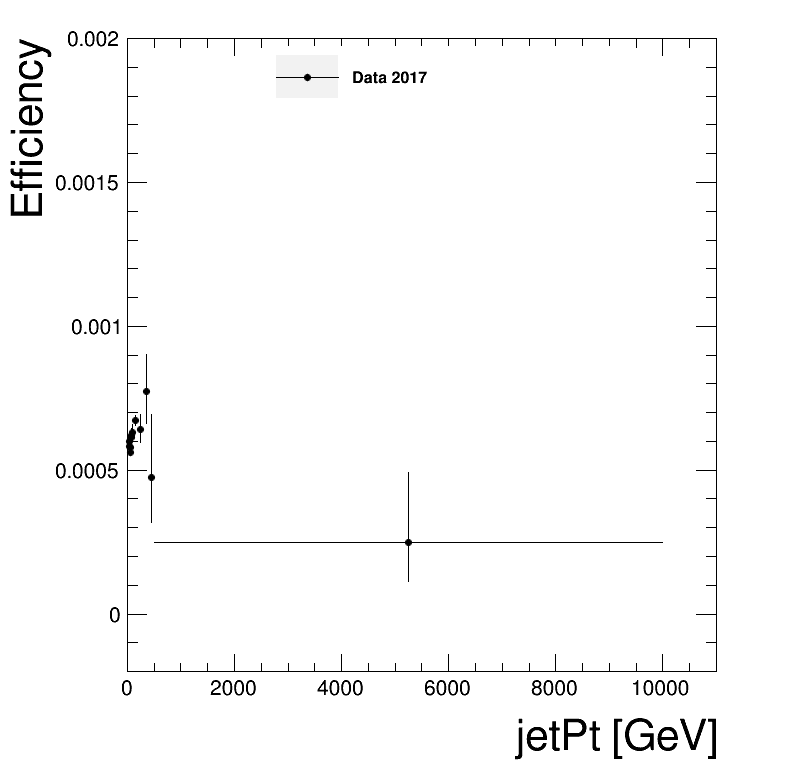

In [34]:

   

# color_list = [1,845,861,806,876,597,625]
color_list = [1, 2, 4, 8, 6, 28, 43, 7, 25, 36, 221, 205, 209, 216, 213, 52, 148]

pEff = {}
for var in variables:
    print('var/x_axis', var[0], 'name', var[2], 'range',var[3],var[4])
    outf = 'tag_eff_jet_'+var[2]+'_rebin.png'
    myfile = rt.TFile( plotDir+outf.replace('.png','.root'), 'RECREATE' )

    c = rt.TCanvas('c','c', 800, 800)
    leg = rt.TLegend(0.33,0.86,0.78,0.94)
#     leg = rt.TLegend(0.33,0.76,0.78,0.94)
    leg.SetTextSize(0.022)
    leg.SetBorderSize(0)
    leg.SetEntrySeparation(0.01)
    i = 0
    for k,v in tree.items(): 
        print(i,k,v)
    

        if 'bb' not in k:
#         if 'QCD' in k:
            pEff[k] = var[1][k]
#             pEff[k] = rt.TEfficiency(eta_num_all[k], eta_den_all[k])
#             pEff[k] = rt.TEfficiency(pt_num_all[k], pt_den_all[k])
            pEff[k].SetTitle("efficiency;"+var[0]+";Efficiency")

            pEff[k].SetLineColor(color_list[i])
            pEff[k].SetMarkerColor(color_list[i])
            pEff[k].SetMarkerSize(0.8)
            pEff[k].SetMarkerStyle(20)

            if i==0:
                pEff[k].Draw("apez")
            else:
                pEff[k].Draw("pezsame")

            rt.gPad.Update()        
            #pEff[k].GetPaintedHistogram().GetXaxis().SetRangeUser(x[0],x[-1])
            pEff[k].GetPaintedGraph().SetMarkerStyle(8)
            pEff[k].GetPaintedGraph().SetMarkerSize(20)        
            pEff[k].GetPaintedGraph().SetLineColor(color_list[i])        
            pEff[k].GetPaintedGraph().SetMarkerColor(color_list[i])        
            pEff[k].GetPaintedGraph().SetMinimum(var[3])
            pEff[k].GetPaintedGraph().SetMaximum(var[4])
            pEff[k].GetPaintedGraph().GetXaxis().SetLabelSize(0.03)
            pEff[k].GetPaintedGraph().GetYaxis().SetLabelSize(0.03)
            
            pEff[k].Write()

#             print('dim: ', pEff[k].GetDimension())
#             print('binN: ', pEff[k].GetPaintedGraph().GetN())
#             print('binN: ', pEff[k].GetPassedHistogram().GetNbinsX())
#             for cnt in range(len(x)):
#                 print('bin number: ',cnt)
#                 print('bin central x value: ', pEff[k].GetPassedHistogram().GetBinCenter(cnt))
#                 print('bin central y value: ', pEff[k].GetEfficiency(cnt))
#                 print('bin error y low: ', pEff[k].GetEfficiencyErrorLow(cnt))
#                 print('bin error y up: ', pEff[k].GetEfficiencyErrorUp(cnt))

            i += 1



            leg.AddEntry(pEff[k],k)

    leg.Draw()

#     c.SetLogx()
#     c.SetLogy()
    c.SetRightMargin(0.1)
    c.Update()
    c.Draw()
    c.SaveAs(plotDir+outf)
    c.SaveAs(plotDir+outf.replace('.png','.C'))
    c.Write()
    myfile.Close()


var/x_axis jetPt [GeV] name pt range -0.0002 0.002
Data 2017 <TTree b'SusyLLPPFTree' at 0x7fb43068f208>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/af/user/jmao/gpu/jmao/cms-llp/plots/20210817/Bkg_Pred/CR_Mu_nodphi_fixBin0_eff_pt/tag_eff_jet_pt_rebin_logX.png has been created
Info in <TCanvas::SaveSource>: C++ Macro file: /storage/af/user/jmao/gpu/jmao/cms-llp/plots/20210817/Bkg_Pred/CR_Mu_nodphi_fixBin0_eff_pt/tag_eff_jet_pt_rebin_logX.C has been generated


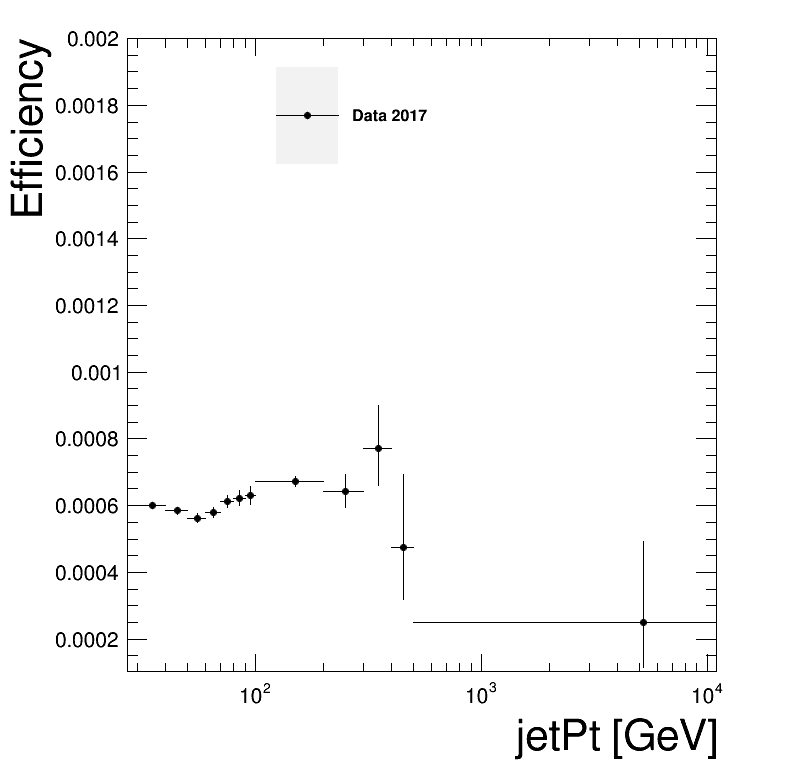

In [35]:

   

# color_list = [1,845,861,806,876,597,625]
color_list = [1, 2, 4, 8, 6, 28, 43, 7, 25, 36, 221, 205, 209, 216, 213, 52, 148]

pEff = {}
for var in variables:
    print('var/x_axis', var[0], 'name', var[2], 'range',var[3],var[4])
#     outf = 'tag_eff_jet_'+var[2]+'_pt100.png'
#     outf = 'tag_eff_jet_'+var[2]+'_rebin.png'
    outf = 'tag_eff_jet_'+var[2]+'_rebin_logX.png'
#     outf = 'tag_eff_jet_'+var[2]+'_rebin_comparison.png'
#     outf = 'tag_eff_jet_'+var[2]+'_rebin_2017_2018.png'
#     outf = 'tag_eff_jet_'+var[2]+'.png'

    myfile = rt.TFile( plotDir+outf.replace('.png','.root'), 'RECREATE' )
    
    c = rt.TCanvas('c','c', 800, 800)
    leg = rt.TLegend(0.33,0.76,0.78,0.94)
    leg.SetTextSize(0.022)
    leg.SetBorderSize(0)
    leg.SetEntrySeparation(0.01)
    i = 0
    for k,v in tree.items(): 
        print(k,v)


        if 'bb' not in k:
#         if 'QCD' in k:
            pEff[k] = var[1][k]
#             pEff[k] = rt.TEfficiency(eta_num_all[k], eta_den_all[k])
#             pEff[k] = rt.TEfficiency(pt_num_all[k], pt_den_all[k])
            pEff[k].SetTitle("efficiency;"+var[0]+";Efficiency")

            pEff[k].SetLineColor(color_list[i])
            pEff[k].SetMarkerColor(color_list[i])
            pEff[k].SetMarkerSize(0.8)
            pEff[k].SetMarkerStyle(20)

            if i==0:
                pEff[k].Draw("apez")
            else:
                pEff[k].Draw("pezsame")

            rt.gPad.Update()        
            #pEff[k].GetPaintedHistogram().GetXaxis().SetRangeUser(x[0],x[-1])
            pEff[k].GetPaintedGraph().SetMarkerStyle(8)
            pEff[k].GetPaintedGraph().SetMarkerSize(20)        
            pEff[k].GetPaintedGraph().SetLineColor(color_list[i])        
            pEff[k].GetPaintedGraph().SetMarkerColor(color_list[i])        
            pEff[k].GetPaintedGraph().SetMinimum(var[3])
            pEff[k].GetPaintedGraph().SetMaximum(var[4])
            pEff[k].GetPaintedGraph().GetXaxis().SetLabelSize(0.03)
            pEff[k].GetPaintedGraph().GetYaxis().SetLabelSize(0.03)
            
            pEff[k].Write()


#             print('dim: ', pEff[k].GetDimension())
#             print('binN: ', pEff[k].GetPaintedGraph().GetN())
#             print('binN: ', pEff[k].GetPassedHistogram().GetNbinsX())
#             for cnt in range(len(x)):
#                 print(cnt)
#                 print('bin central x value: ', pEff[k].GetPassedHistogram().GetBinCenter(cnt))
#                 print('bin central y value: ', pEff[k].GetEfficiency(cnt))
#                 print('bin error y low: ', pEff[k].GetEfficiencyErrorLow(cnt))
#                 print('bin error y up: ', pEff[k].GetEfficiencyErrorUp(cnt))

            i += 1



            leg.AddEntry(pEff[k],k)

    leg.Draw()

    c.SetLogx()
#     c.SetLogy()
    c.SetRightMargin(0.1)
    c.Update()
    c.Draw()
    c.SaveAs(plotDir+outf)
    c.SaveAs(plotDir+outf.replace('.png','.C'))
    c.Write()
    myfile.Close()
    

var/x_axis jetPt [GeV] name pt range -0.0002 0.002
Data 2017 <TTree b'SusyLLPPFTree' at 0x7fb43068f208>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/af/user/jmao/gpu/jmao/cms-llp/plots/20210817/Bkg_Pred/CR_Mu_nodphi_fixBin0_eff_pt/tag_eff_jet_pt_rebin_logX.png has been created
Info in <TCanvas::SaveSource>: C++ Macro file: /storage/af/user/jmao/gpu/jmao/cms-llp/plots/20210817/Bkg_Pred/CR_Mu_nodphi_fixBin0_eff_pt/tag_eff_jet_pt_rebin_logX.C has been generated


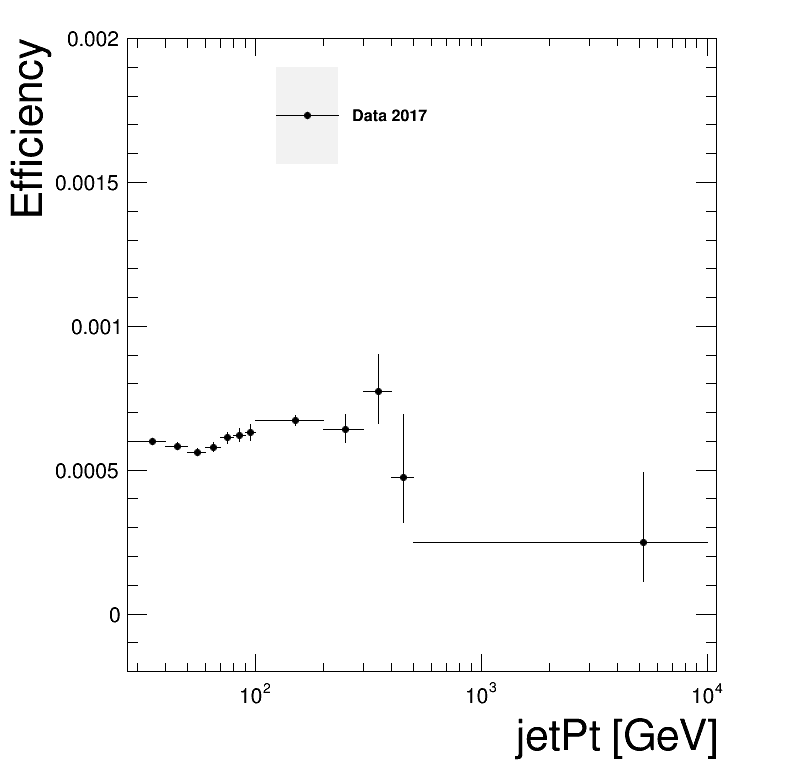

In [36]:

   

# color_list = [1,845,861,806,876,597,625]
color_list = [1, 2, 4, 8, 6, 28, 43, 7, 25, 36, 221, 205, 209, 216, 213, 52, 148]

pEff = {}
for var in variables:
    print('var/x_axis', var[0], 'name', var[2], 'range',var[3],var[4])
#     outf = 'tag_eff_jet_'+var[2]+'_pt100.png'
#     outf = 'tag_eff_jet_'+var[2]+'_rebin.png'
    outf = 'tag_eff_jet_'+var[2]+'_rebin_logX.png'
#     outf = 'tag_eff_jet_'+var[2]+'_rebin_comparison.png'
#     outf = 'tag_eff_jet_'+var[2]+'_rebin_2017_2018.png'
#     outf = 'tag_eff_jet_'+var[2]+'.png'

    myfile = rt.TFile( plotDir+outf.replace('.png','.root'), 'RECREATE' )
    
    c = rt.TCanvas('c','c', 800, 800)
    leg = rt.TLegend(0.33,0.76,0.78,0.94)
    leg.SetTextSize(0.022)
    leg.SetBorderSize(0)
    leg.SetEntrySeparation(0.01)
    i = 0
    for k,v in tree.items(): 
        print(k,v)


        if 'bb' not in k:
#         if 'QCD' in k:
            pEff[k] = var[1][k]
#             pEff[k] = rt.TEfficiency(eta_num_all[k], eta_den_all[k])
#             pEff[k] = rt.TEfficiency(pt_num_all[k], pt_den_all[k])
            pEff[k].SetTitle("efficiency;"+var[0]+";Efficiency")

            pEff[k].SetLineColor(color_list[i])
            pEff[k].SetMarkerColor(color_list[i])
            pEff[k].SetMarkerSize(0.8)
            pEff[k].SetMarkerStyle(20)

            if i==0:
                pEff[k].Draw("apez")
            else:
                pEff[k].Draw("pezsame")

            rt.gPad.Update()        
            #pEff[k].GetPaintedHistogram().GetXaxis().SetRangeUser(x[0],x[-1])
            pEff[k].GetPaintedGraph().SetMarkerStyle(8)
            pEff[k].GetPaintedGraph().SetMarkerSize(20)        
            pEff[k].GetPaintedGraph().SetLineColor(color_list[i])        
            pEff[k].GetPaintedGraph().SetMarkerColor(color_list[i])        
            pEff[k].GetPaintedGraph().SetMinimum(var[3])
            pEff[k].GetPaintedGraph().SetMaximum(var[4])
            pEff[k].GetPaintedGraph().GetXaxis().SetLabelSize(0.03)
            pEff[k].GetPaintedGraph().GetYaxis().SetLabelSize(0.03)
            
            pEff[k].Write(k)


#             print('dim: ', pEff[k].GetDimension())
#             print('binN: ', pEff[k].GetPaintedGraph().GetN())
#             print('binN: ', pEff[k].GetPassedHistogram().GetNbinsX())
#             for cnt in range(len(x)):
#                 print(cnt)
#                 print('bin central x value: ', pEff[k].GetPassedHistogram().GetBinCenter(cnt))
#                 print('bin central y value: ', pEff[k].GetEfficiency(cnt))
#                 print('bin error y low: ', pEff[k].GetEfficiencyErrorLow(cnt))
#                 print('bin error y up: ', pEff[k].GetEfficiencyErrorUp(cnt))

            i += 1



            leg.AddEntry(pEff[k],k)

    leg.Draw()

    c.SetLogx()
#     c.SetLogy()
    c.SetRightMargin(0.1)
    c.Update()
    c.Draw()
    c.SaveAs(plotDir+outf)
    c.SaveAs(plotDir+outf.replace('.png','.C'))
    c.Write()
    myfile.Close()
    

In [37]:
variables = [
    
 
        ['jetPt [GeV]', pt_denall, 50, 0, 2000],
      
    
 
]

var/x_axis jetPt [GeV] name 50 range 0 2000
Data 2017 <TTree b'SusyLLPPFTree' at 0x7fb43068f208>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/af/user/jmao/gpu/jmao/cms-llp/plots/20210817/Bkg_Pred/CR_Mu_nodphi_fixBin0_eff_pt/pt_jet.png has been created


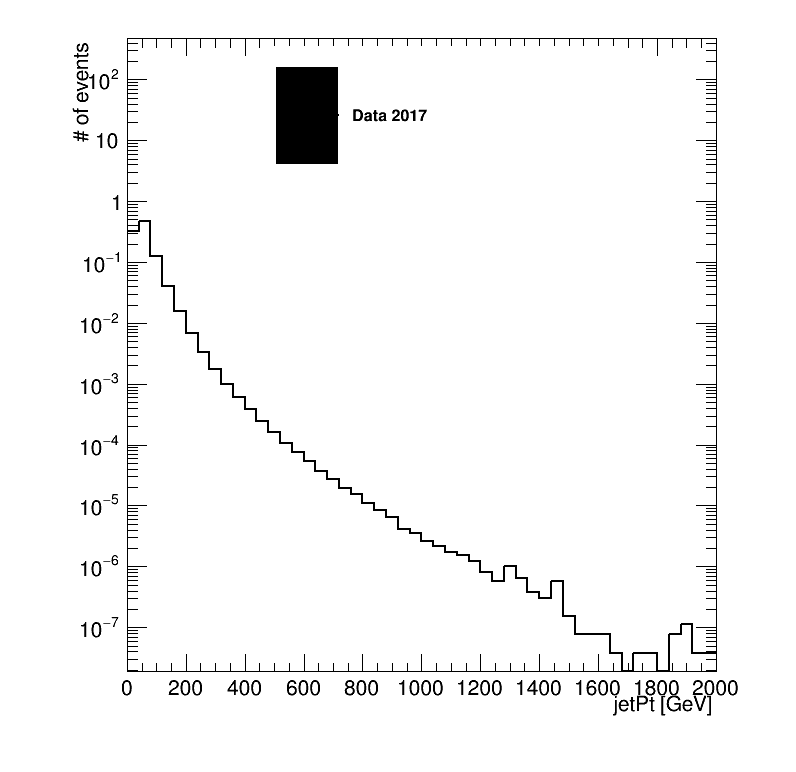

In [38]:

   

color_list = [1,845,861,806,876,597,625]

ptHist= {}
peHist= {}
for var in variables:
    print('var/x_axis', var[0], 'name', var[2], 'range',var[3],var[4])
    outf = 'pt_jet.png'
    c = rt.TCanvas('c','c', 800, 800)
    leg = rt.TLegend(0.33,0.76,0.78,0.94)
    leg.SetTextSize(0.022)
    leg.SetBorderSize(0)
    leg.SetEntrySeparation(0.01)
    i = 0
    for k,v in tree.items(): 
        print(k,v)


        if 'bb' not in k:
            ptHist[k] = create_TH1D( var[1][k], axis_title=[var[0], '# of events'], name="", binning=[var[2],var[3],var[4]], weights=wall[k])
           

            ptHist[k].SetLineColor(color_list[i])
            ptHist[k].SetMarkerColor(color_list[i])
            ptHist[k].SetMarkerSize(0.8)
#             ptHist[k].SetMarkerStyle(20)

#             if i==0:
#                 ptHist[k].Draw("ahist")
#             else:
#                 ptHist[k].Draw("histsame")

#            ptHist[k].Sumw2()
          
            ptHist[k].GetXaxis().SetTitleSize(0.03)
            ptHist[k].GetYaxis().SetTitleSize(0.03)
            ptHist[k].GetXaxis().SetLabelSize(0.03)
            ptHist[k].GetYaxis().SetLabelSize(0.03)
            ptHist[k].SetMaximum(1e+3*(ptHist[k].GetMaximum()))
            ptHist[k].DrawNormalized("Hist same")

            peHist[k] =ptHist[k].Clone()
            peHist[k].SetFillColor(color_list[i])
            #            peHist[k].Draw("e2 same")

            leg.AddEntry(peHist[k],k )


            i += 1



#             leg.AddEntry(pEff[k],k)

    leg.Draw()

#     c.SetLogx()
    c.SetLogy()
    c.SetRightMargin(0.1)
    c.Update()
    c.Draw()
    c.SaveAs(plotDir+outf)


In [39]:
variables = [
    
 
        ['jetPt [GeV]', pt_numall, 50, 0, 2000],
      
    
 
]

var/x_axis jetPt [GeV] name 50 range 0 2000
Data 2017 <TTree b'SusyLLPPFTree' at 0x7fb43068f208>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/af/user/jmao/gpu/jmao/cms-llp/plots/20210817/Bkg_Pred/CR_Mu_nodphi_fixBin0_eff_pt/pt_jet_pass.png has been created


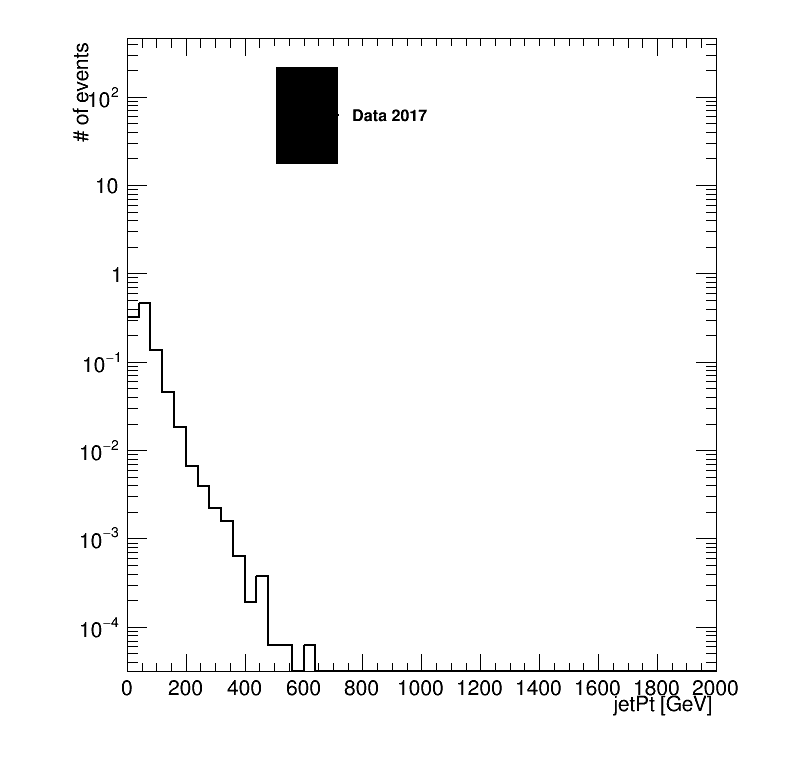

In [40]:

   

color_list = [1,845,861,806,876,597,625]

ptHist= {}
peHist= {}
for var in variables:
    print('var/x_axis', var[0], 'name', var[2], 'range',var[3],var[4])
    outf = 'pt_jet_pass.png'
    c = rt.TCanvas('c','c', 800, 800)
    leg = rt.TLegend(0.33,0.76,0.78,0.94)
    leg.SetTextSize(0.022)
    leg.SetBorderSize(0)
    leg.SetEntrySeparation(0.01)
    i = 0
    for k,v in tree.items(): 
        print(k,v)


        if 'bb' not in k:
            ptHist[k] = create_TH1D( var[1][k], axis_title=[var[0], '# of events'], name="", binning=[var[2],var[3],var[4]], weights=wnum[k])
           

            ptHist[k].SetLineColor(color_list[i])
#             ptHist[k].SetLineStyle(i+1)
            ptHist[k].SetMarkerColor(color_list[i])
            ptHist[k].SetMarkerSize(0.8)
            ptHist[k].SetMarkerStyle(20)

#             if i==0:
#                 ptHist[k].Draw("ahist")
#             else:
#                 ptHist[k].Draw("histsame")

#            ptHist[k].Sumw2()
          
            ptHist[k].GetXaxis().SetTitleSize(0.03)
            ptHist[k].GetYaxis().SetTitleSize(0.03)
            ptHist[k].GetXaxis().SetLabelSize(0.03)
            ptHist[k].GetYaxis().SetLabelSize(0.03)
            ptHist[k].SetMaximum(1e+3*(ptHist[k].GetMaximum()))
            ptHist[k].DrawNormalized("Hist same")

            peHist[k] =ptHist[k].Clone()
            peHist[k].SetFillColor(color_list[i])
            #            peHist[k].Draw("e2 same")

            leg.AddEntry(peHist[k],k )


            i += 1



#             leg.AddEntry(pEff[k],k)

    leg.Draw()

#     c.SetLogx()
    c.SetLogy()
    c.SetRightMargin(0.1)
    c.Update()
    c.Draw()
    c.SaveAs(plotDir+outf)


# numpy eff

In [20]:
# read input
# transfer eff to array
# x=array('d', [1,10,20,30,40,50,60,70,80,90,100,1000])
x=array('d', [1,10,20,30,40,50,60,70,80,90,100,200,300,400,500,10000])

effs = {}
effs_eff = {}
effs_errUp = {}
effs_errDown = {}

for k,v in tree.items():
    print(k,v)
   
    effs[k] = pEff[k]
    print(type(effs[k]))

    effs_eff[k] = []
    effs_errUp[k] = []
    effs_errDown[k] = []

    for cnt in range(len(x)):
        effs_eff[k].append(effs[k].GetEfficiency(cnt))
        effs_errUp[k].append(effs[k].GetEfficiencyErrorUp(cnt))
        effs_errDown[k].append(effs[k].GetEfficiencyErrorLow(cnt))

    print(effs_eff[k])
    print(effs_errUp[k])
    print(effs_errDown[k])

#         print('binN: ', effs[k].GetPassedHistogram().GetNbinsX())
    for cnt in range(len(x)):
#             print(cnt)
#             print('bin Num: ', effs[k].GetPassedHistogram().FindBin(cnt))
        print('bin central x value: ', effs[k].GetPassedHistogram().GetBinCenter(cnt))
        print('bin central y value: ', effs[k].GetEfficiency(cnt))
#             print('bin error y low: ', effs[k].GetEfficiencyErrorLow(cnt))
#             print('bin error y up: ', effs[k].GetEfficiencyErrorUp(cnt))

        

Data 2017 <TTree b'SusyLLPPFTree' at 0x7fcf9086e5c0>
<class 'ROOT.TEfficiency'>
[0.0, 0.0, 0.0, 0.0, 0.0006012593463836564, 0.0005840177301388083, 0.0005629520960465209, 0.0005795803587121181, 0.0006121704851116177, 0.0006220622046109858, 0.0006302055084792285, 0.0006726672979313797, 0.0006418879700634376, 0.0007722131951929729, 0.0004751847940865892, 0.0002498334443704197]
[1.0, 1.0, 1.0, 1.0, 8.485532025823053e-06, 1.0931599560914961e-05, 1.3170819508123428e-05, 1.5991046830553897e-05, 1.9465308191657935e-05, 2.3180931873966262e-05, 2.740845810491894e-05, 1.6235202849972357e-05, 5.029445161412976e-05, 0.00012826361361214448, 0.00021693672461675883, 0.00024296025460572639]
[0.0, 0.0, 0.0, 0.0, 8.36831565193593e-06, 1.0732646636859677e-05, 1.287319748190577e-05, 1.5567440928050767e-05, 1.8874574160077876e-05, 2.236272334171915e-05, 2.6289007312674533e-05, 1.585717662422651e-05, 4.675994505720649e-05, 0.00011103825794794419, 0.00015539336047257446, 0.0001359650783500806]
bin central x v

# Read from Root

In [41]:
#eff tag
tags = []
tags = [
#         'Data 2016B-F',
#         'Data 2016G-H',
        'Data 2017',
#         'Data 2018AB',
#         'Data 2018CD',
    
#         'Data 2017',
]

#reg tag
regs = []
regs = [
    'CR WToMN',
#     'CR WToMN minDPhi',
#     'CR WToEN',
#     'CR WToEN minDPhi',
#     'CR',
#     'MR',
#     'SR',
#     'minDR_CR',
#     'minDR_MR',
#     'minDR_SR',   
]

# directory
dirs = {}
 

# dirs['CR WToMN'] = '/storage/af/user/jmao/gpu/jmao/cms-llp/plots/20210817/Bkg_Pred/CR_Mu_nodphi_fixBin0/'
dirs['CR WToMN'] = '/storage/af/user/jmao/gpu/jmao/cms-llp/plots/20210817/Bkg_Pred/CR_Mu_nodphi_fixBin0_eff_pt/'
 
# file name
fname = 'tag_eff_jet_pt_rebin_logX.root'

In [42]:
x=array('d', [1,10,20,30,40,50,60,70,80,90,100,200,300,400,500,10000])

effs = {}
effs_eff = {}
effs_errUp = {}
effs_errDown = {}

for reg in regs:
    print(reg)
#     print(dirs[reg])
    root_file = dirs[reg]+fname
#     print(root_file)
    rf = rt.TFile(root_file, 'read')
#     print(type(rf))
    effs[reg] = {}
    effs_eff[reg] = {}
    effs_errUp[reg] = {}
    effs_errDown[reg] = {}
    for tag in tags:
        effs[reg][tag] = rf.Get(tag)
        print(type(effs[reg][tag]))
        
        effs_eff[reg][tag] = []
        effs_errUp[reg][tag] = []
        effs_errDown[reg][tag] = []
        
        for cnt in range(len(x)):
            effs_eff[reg][tag].append(effs[reg][tag].GetEfficiency(cnt))
            effs_errUp[reg][tag].append(effs[reg][tag].GetEfficiencyErrorUp(cnt))
            effs_errDown[reg][tag].append(effs[reg][tag].GetEfficiencyErrorLow(cnt))
        
        print(effs_eff[reg][tag])
        print(effs_errUp[reg][tag])
        print(effs_errDown[reg][tag])
        
#         print('binN: ', effs[reg][tag].GetPassedHistogram().GetNbinsX())
        for cnt in range(len(x)):
#             print(cnt)
#             print('bin Num: ', effs[reg][tag].GetPassedHistogram().FindBin(cnt))
            print('Bin No.',cnt,'bin central x value: ', effs[reg][tag].GetPassedHistogram().GetBinCenter(cnt),'bin central y value: ', effs[reg][tag].GetEfficiency(cnt))
#             print('bin central y value: ', effs[reg][tag].GetEfficiency(cnt))
#             print('bin error y low: ', effs[reg][tag].GetEfficiencyErrorLow(cnt))
#             print('bin error y up: ', effs[reg][tag].GetEfficiencyErrorUp(cnt))


CR WToMN
<class 'ROOT.TEfficiency'>
[0.0, 0.0, 0.0, 0.0, 0.0006012593463836564, 0.0005840177301388083, 0.0005629520960465209, 0.0005795803587121181, 0.0006121704851116177, 0.0006220622046109858, 0.0006302055084792285, 0.0006726672979313797, 0.0006418879700634376, 0.0007722131951929729, 0.0004751847940865892, 0.0002498334443704197]
[1.0, 1.0, 1.0, 1.0, 8.485532025823053e-06, 1.0931599560914961e-05, 1.3170819508123428e-05, 1.5991046830553897e-05, 1.9465308191657935e-05, 2.3180931873966262e-05, 2.740845810491894e-05, 1.6235202849972357e-05, 5.029445161412976e-05, 0.00012826361361214448, 0.00021693672461675883, 0.00024296025460572639]
[0.0, 0.0, 0.0, 0.0, 8.36831565193593e-06, 1.0732646636859677e-05, 1.287319748190577e-05, 1.5567440928050767e-05, 1.8874574160077876e-05, 2.236272334171915e-05, 2.6289007312674533e-05, 1.585717662422651e-05, 4.675994505720649e-05, 0.00011103825794794419, 0.00015539336047257446, 0.0001359650783500806]
Bin No. 0 bin central x value:  -332.3 bin central y value:

# Prediction

In [43]:
# Lisa's timesaving bkg pred

# tag_0lep_pt = {}
untag_0lep_pt = {}

from prettytable import PrettyTable
table =  PrettyTable(['Sample', 'Eff', 'Bin 1 Pred', 'Bin 1 Pred Err', 'Bin 2 Pred', 'Bin 2 Pred Err', 'Bin 2 Pred from 1', 'Bin 2 Pred from 1 Err' ])
 


for k,v in tree.items():
    print(k,v)
    
    untagged_jet_0lep = np.logical_and(1, trg_0lep_dnnv3[k]<=dnn_cut) 
        
    weight=1

#     bin0_m = nTags_0lep[k][nTags_0lep[k] ==0]
#     bin1_m = nTags_0lep[k][nTags_0lep[k] ==1]
#     bin2_m = nTags_0lep[k][nTags_0lep[k] >1]
    
    bin0_m = trg_0lep_w[k][nTags_0lep[k] ==0]
    bin1_m = trg_0lep_w[k][nTags_0lep[k] ==1]
    bin2_m = trg_0lep_w[k][nTags_0lep[k] >1]
    
    bin0 = bin0_m*weight #np.multiply(bin0_m,weight)
    bin1 = bin1_m*weight
    bin2 = bin2_m*weight
    
    print(bin0)
    print(bin1)
    print(bin2)
        
    untag_0lep_pt[k] = trg_0lep_pt[k][untagged_jet_0lep] 
    
    print(trg_0lep_pt[k][:100])
    print(tag_0lep_pt[k][:100])
    print(untag_0lep_pt[k][:100])
    
        
#     eff_np = effs_eff[k]
    for reg in regs:
#         for tag in tags:
        eff_np = effs_eff[reg][k]

        prob_vec = []

        i=0
        for i in range(len(x)):
            if i<len(x)-1:
    #                 print(i, x[i],x[i+1])
    #                 print(np.logical_and(untag_0lep_pt[k]>=x[i],untag_0lep_pt[k]<x[i+1]))
    #                 print(np.logical_and(untag_0lep_pt[k]>=x[i],untag_0lep_pt[k]<x[i+1])*eff_np[i])
                prob_vec.append(np.logical_and(untag_0lep_pt[k]>=x[i],untag_0lep_pt[k]<x[i+1])*eff_np[i])#*weight)
            else:
    #                 print(i, x[i])
    #                 print(np.logical_and(untag_0lep_pt[k]>=x[i],1))
                prob_vec.append((untag_0lep_pt[k]>=x[i])*eff_np[i])#*weight)



        prob_tot = sum(prob_vec)
        somma = (prob_tot*weight).sum()
        cho = prob_tot.choose(2)
        #u = cho.unzip()
        combi = cho.unzip()[0] * cho.unzip()[1] * weight

#     print("pt shape ", untag_0lep_pt[k].shape)
# #         print("prob shape ", np.array(prob_vec[reg]).shape)
# #         print("prob_tot shape ", prob_tot.shape)
#     print("somma shape ", somma.shape)

#     print("prob_tot", prob_tot)
#     print("somma", somma)
#     #print "bin1_m shape ", bin1_m.shape
#     #print "somma[bin1_m] shape ", (somma[bin1_m]).sum()#.shape
#     print("bin 1 pred: ", somma.sum())
#     print("bin 2 pred: ", combi.sum().sum())
#     print("bin 2 pred from bin1: ", somma[nTags_0lep[k] ==1].sum())

        lumi=1
        sf=1

        w1s_sq = np.array([x*x for x in somma])
        e1 = math.sqrt(np.sum(w1s_sq))
        w2s_sq = np.array([x*x for x in combi.sum()])
        e2 = math.sqrt(np.sum(w2s_sq))
        w21s_sq = np.array([x*x for x in somma[nTags_0lep[k] ==1]])
        e21 = math.sqrt(np.sum(w21s_sq))

        digit=4
        row = [k, k, 
               round(np.sum(somma),digit) , round( e2  ,digit), 
               round (np.sum((combi.sum())), digit) , round( e2,digit),  
               round (np.sum(somma[nTags_0lep[k] ==1])*lumi*sf, digit) , round ( e21 , digit)]
        table.add_row(row)

print('\n\n======================= Summary ==============================')
print(table)

table_txt = table.get_string()
# with open(plotDir+'/Prediction_2017B.txt','w') as file:
with open(plotDir+'/Prediction_2017.txt','w') as file:
    file.write(table_txt)
        

Data 2017 <TTree b'SusyLLPPFTree' at 0x7fb43068f208>


/usr/local/lib/python3.6/site-packages/awkward/array/jagged.py:1031: RuntimeWarning: invalid value encountered in less_equal
  result = getattr(ufunc, method)(*inputs, **kwargs)


[1. 1. 1. ... 1. 1. 1.]
[1. 1. 1. ... 1. 1. 1.]
[1. 1. 1. 1. 1.]
[[] [] [] ... [] [] []]
[[] [] [] ... [] [] []]
[[] [] [] ... [] [] []]


======================= Summary ==============================
+-----------+-----------+------------+----------------+------------+----------------+-------------------+-----------------------+
|   Sample  |    Eff    | Bin 1 Pred | Bin 1 Pred Err | Bin 2 Pred | Bin 2 Pred Err | Bin 2 Pred from 1 | Bin 2 Pred from 1 Err |
+-----------+-----------+------------+----------------+------------+----------------+-------------------+-----------------------+
| Data 2017 | Data 2017 |  10630.35  |     0.0013     |   1.474    |     0.0013     |       3.2839      |         0.0587        |
+-----------+-----------+------------+----------------+------------+----------------+-------------------+-----------------------+


In [50]:
print(prob_vec[:10])
print(len(prob_vec))
print(somma)
print(len(somma))
print(somma[:10])
print(np.sum(somma))
print(somma.sum())
print(np.sum(somma[nTags_0lep[k]==0]))


[<JaggedArray [[] [] [] ... [0.0 0.0] [] []] at 0x7fb2e9df2e80>, <JaggedArray [[] [] [] ... [0.0 0.0] [] []] at 0x7fb2e9df2cf8>, <JaggedArray [[] [] [] ... [0.0 0.0] [] []] at 0x7fb2990b9c18>, <JaggedArray [[] [] [] ... [0.0 0.0] [] []] at 0x7fb2e9df27b8>, <JaggedArray [[] [] [] ... [0.0 0.0006012593463836564] [] []] at 0x7fb2e9df2c18>, <JaggedArray [[] [] [] ... [0.0 0.0] [] []] at 0x7fb2990b9ba8>, <JaggedArray [[] [] [] ... [0.0005629520960465209 0.0] [] []] at 0x7fb2e9df2d30>, <JaggedArray [[] [] [] ... [0.0 0.0] [] []] at 0x7fb2e9df2be0>, <JaggedArray [[] [] [] ... [0.0 0.0] [] []] at 0x7fb2e9df2b70>, <JaggedArray [[] [] [] ... [0.0 0.0] [] []] at 0x7fa86ba7be10>]
16
[0.         0.         0.         ... 0.00116421 0.         0.        ]
156220186
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
10630.350042628814
10630.350042628814
10627.066147272875


In [ ]:
# print('\n\n======================= Summary ==============================')
# print(table)

# table_txt = table.get_string()
# with open(plotDir+'/Prediction_2017B.txt','w') as file:
#     file.write(table_txt)
        

In [ ]:
# # Lisa's timesaving bkg pred

# # tag_0lep_pt = {}
# untag_0lep_pt = {}

# for k,v in tree.items():
#     print(k,v)
    
#     untagged_jet_0lep = np.logical_and(1, trg_0lep_dnnv3[k]<=dnn_cut) 
        
#     weight=1

# #     bin0_m = nTags_0lep[k][nTags_0lep[k] ==0]
# #     bin1_m = nTags_0lep[k][nTags_0lep[k] ==1]
# #     bin2_m = nTags_0lep[k][nTags_0lep[k] >1]
    
#     bin0_m = trg_0lep_w[k][nTags_0lep[k] ==0]
#     bin1_m = trg_0lep_w[k][nTags_0lep[k] ==1]
#     bin2_m = trg_0lep_w[k][nTags_0lep[k] >1]
    
#     bin0 = bin0_m*weight #np.multiply(bin0_m,weight)
#     bin1 = bin1_m*weight
#     bin2 = bin2_m*weight
    
#     print(bin0)
#     print(bin1)
#     print(bin2)
        
#     untag_0lep_pt[k] = trg_0lep_pt[k][untagged_jet_0lep] 
    
#     print(trg_0lep_pt[k][:100])
#     print(tag_0lep_pt[k][:100])
#     print(untag_0lep_pt[k][:100])
    
        
#     eff_np = effs_eff[k]

#     prob_vec = []

#     i=0
#     for i in range(len(x)):
#         if i<len(x)-1:
# #                 print(i, x[i],x[i+1])
# #                 print(np.logical_and(untag_0lep_pt[k]>=x[i],untag_0lep_pt[k]<x[i+1]))
# #                 print(np.logical_and(untag_0lep_pt[k]>=x[i],untag_0lep_pt[k]<x[i+1])*eff_np[i])
#             prob_vec.append(np.logical_and(untag_0lep_pt[k]>=x[i],untag_0lep_pt[k]<x[i+1])*eff_np[i])#*weight)
#         else:
# #                 print(i, x[i])
# #                 print(np.logical_and(untag_0lep_pt[k]>=x[i],1))
#             prob_vec.append((untag_0lep_pt[k]>=x[i])*eff_np[i])#*weight)



#     prob_tot = sum(prob_vec)
#     somma = (prob_tot*weight).sum()
#     cho = prob_tot.choose(2)
#     #u = cho.unzip()
#     combi = cho.unzip()[0] * cho.unzip()[1] * weight

#     print("pt shape ", untag_0lep_pt[k].shape)
# #         print("prob shape ", np.array(prob_vec[reg]).shape)
# #         print("prob_tot shape ", prob_tot.shape)
#     print("somma shape ", somma.shape)

#     print("prob_tot", prob_tot)
#     print("somma", somma)
#     #print "bin1_m shape ", bin1_m.shape
#     #print "somma[bin1_m] shape ", (somma[bin1_m]).sum()#.shape
#     print("bin 1 pred: ", somma.sum())
#     print("bin 2 pred: ", combi.sum().sum())
#     print("bin 2 pred from bin1: ", somma[nTags_0lep[k] ==1].sum())


        

In [ ]:
# print(somma.sum())
# print(np.sum(somma))
# print(combi.sum().sum())
# print(np.sum((combi.sum())))
# print(somma[nTags_0lep[k] ==1].sum())
# print(np.sum(somma[nTags_0lep[k] ==1]))


In [ ]:
# from prettytable import PrettyTable
# print('\n\n======================= Summary ==============================')
# table =  PrettyTable(['Sample', 'Eff', 'Bin 1 Pred', 'Bin 1 Pred Err', 'Bin 2 Pred', 'Bin 2 Pred Err', 'Bin 2 Pred from 1', 'Bin 2 Pred from 1 Err' ])
# for k,v in tree.items():
#     lumi=1
#     sf=1

#     w1s_sq = np.array([x*x for x in somma])
#     e1 = math.sqrt(np.sum(w1s_sq))
#     w2s_sq = np.array([x*x for x in combi.sum()])
#     e2 = math.sqrt(np.sum(w2s_sq))
#     w21s_sq = np.array([x*x for x in somma[nTags_0lep[k] ==1]])
#     e21 = math.sqrt(np.sum(w21s_sq))
    
#     row = [k, k, 
#            round(np.sum(somma),2) , round( e2  ,2), 
#            round (np.sum((combi.sum())), 2) , round( e2,2),  
#            round (np.sum(somma[nTags_0lep[k] ==1])*lumi*sf, 2) , round ( e21 , 2)]
#     table.add_row(row)

# print(table)

# table_txt = table.get_string()
# with open(plotDir+'/Prediction.txt','w') as file:
#     file.write(table_txt)
